In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# histogram 获取直方图数据

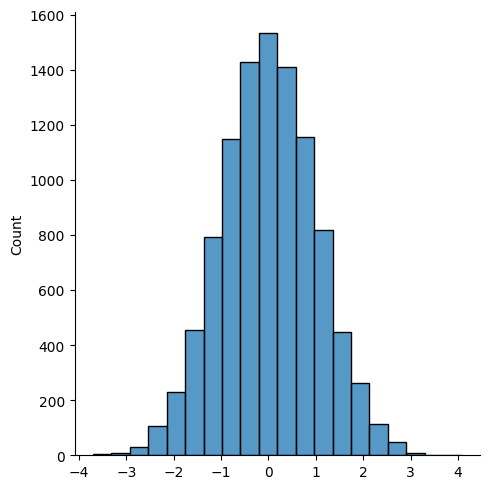

In [70]:
x = np.random.normal(0, 1, 10000)

In [71]:
bins = np.arange(-4, 5)
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [72]:
histogram, bins_ = np.histogram(x, bins=bins, density=True)
histogram, bins_

(array([0.00110011, 0.01960196, 0.13791379, 0.34273427, 0.3380338 ,
        0.13571357, 0.02410241, 0.00080008]),
 array([-4, -3, -2, -1,  0,  1,  2,  3,  4]))

In [73]:
bins = 0.5 * (bins[:-1] + bins[1:])
bins

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

In [74]:
len(bins), len(histogram)

(8, 8)

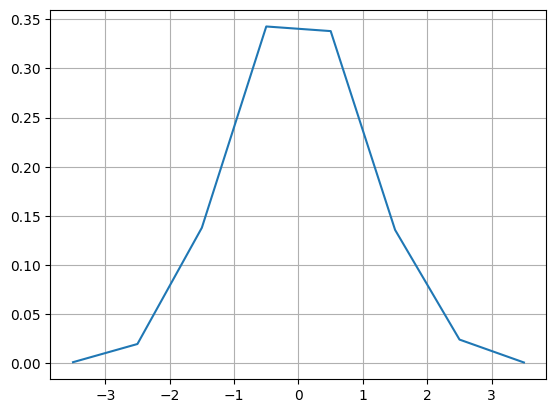

In [75]:
plt.plot(bins, histogram)
plt.grid(True)

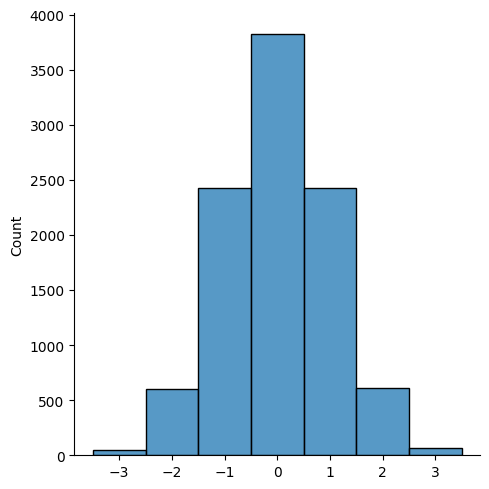

In [77]:
sns.displot(x, bins=bins)

(array([  48.,  602., 2427., 3820., 2421.,  615.,   62.]),
 array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5]),
 <BarContainer object of 7 artists>)

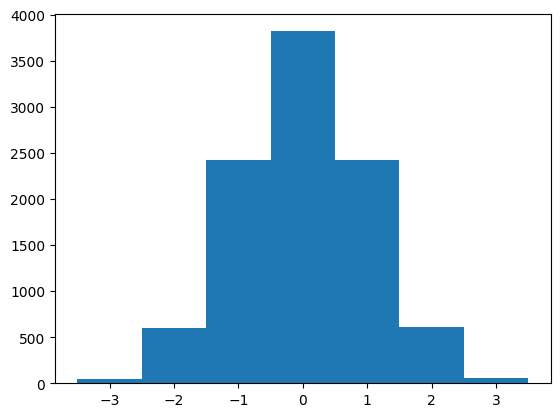

In [81]:
plt.hist(x, bins=bins)